In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_excel('customer_data.xlsx')

In [3]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [5]:
# Drop duplicate values
data.drop_duplicates(inplace=True)

In [6]:
# Check for null values
data.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
# Fill the null values
data['Gender'].value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

The count of females is very high compared to the number of men hence, we'll fill the missing values with female as gender

In [8]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [9]:
data['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

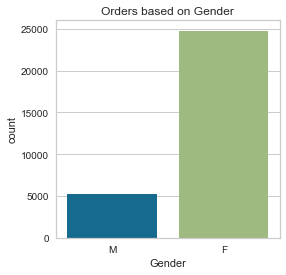

In [10]:
plt.figure(figsize=(4,4))
plt.title('Orders based on Gender')
sns.countplot(x = data['Gender'])
plt.show()

In [11]:
# Descriptive statistics of numerical data present in the dataset
data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


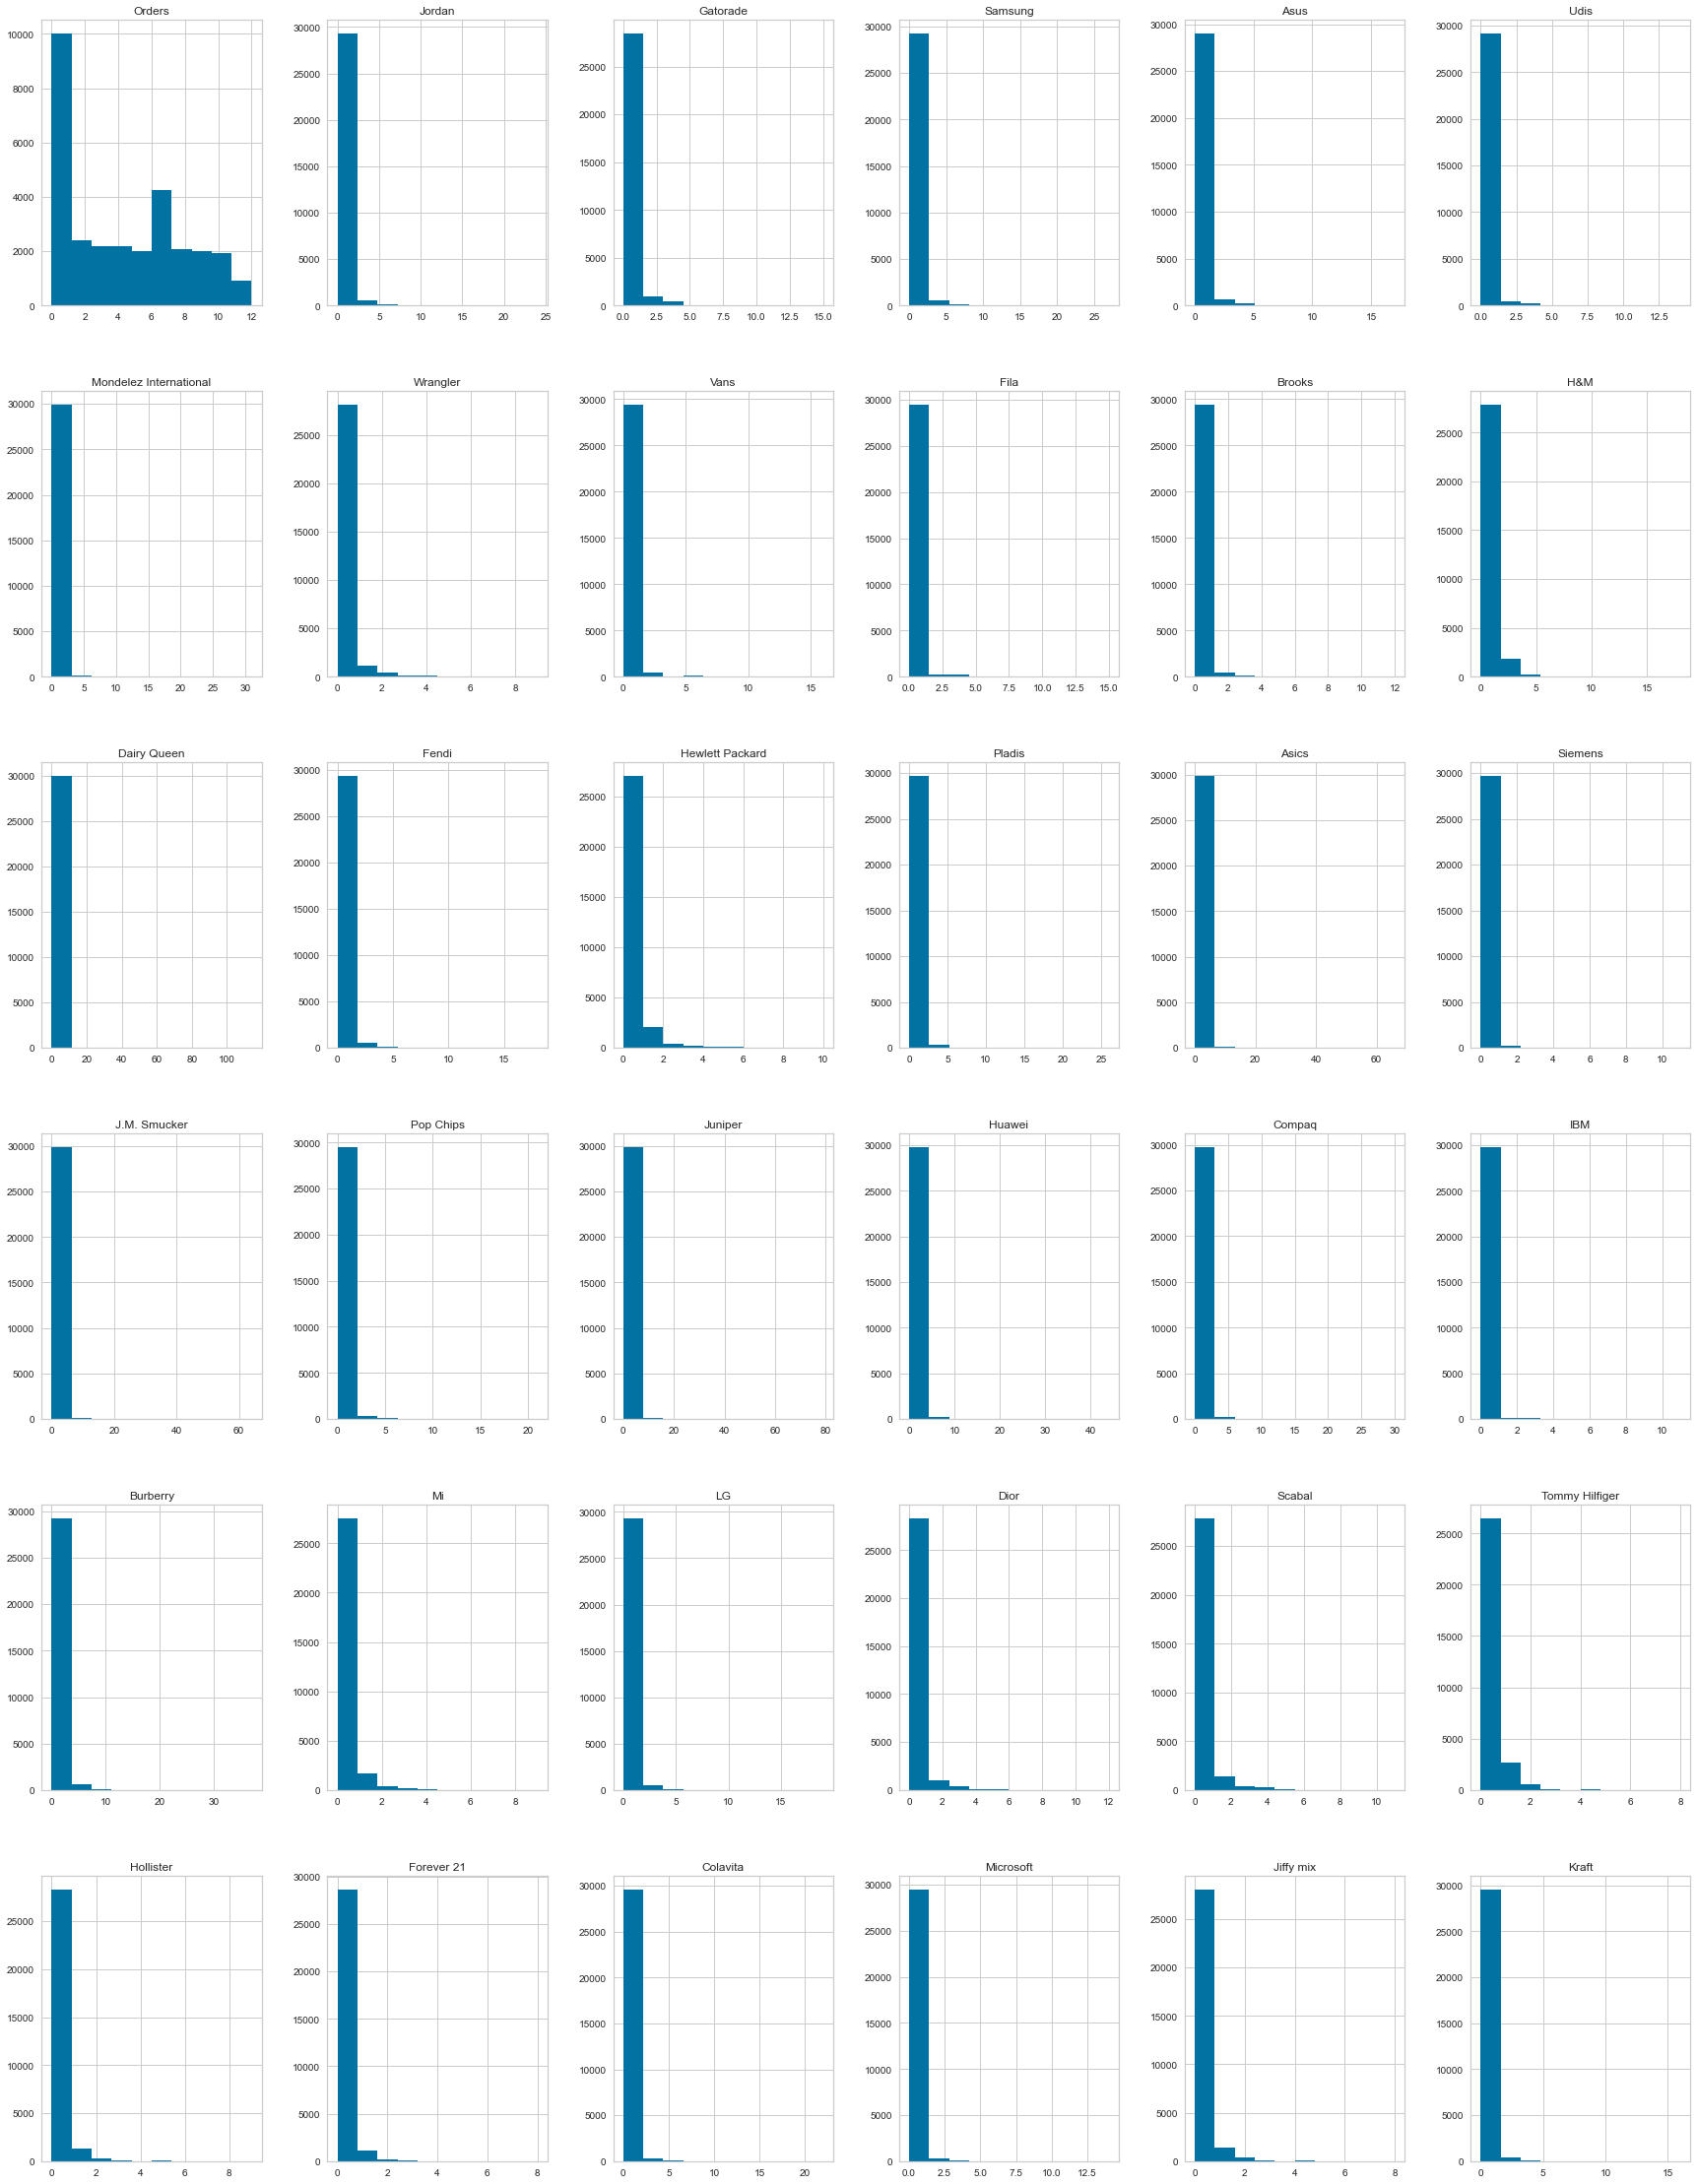

In [12]:
# Plot the histogram of all brands
data.iloc[:,2:].hist(figsize = (30,40))
plt.show()

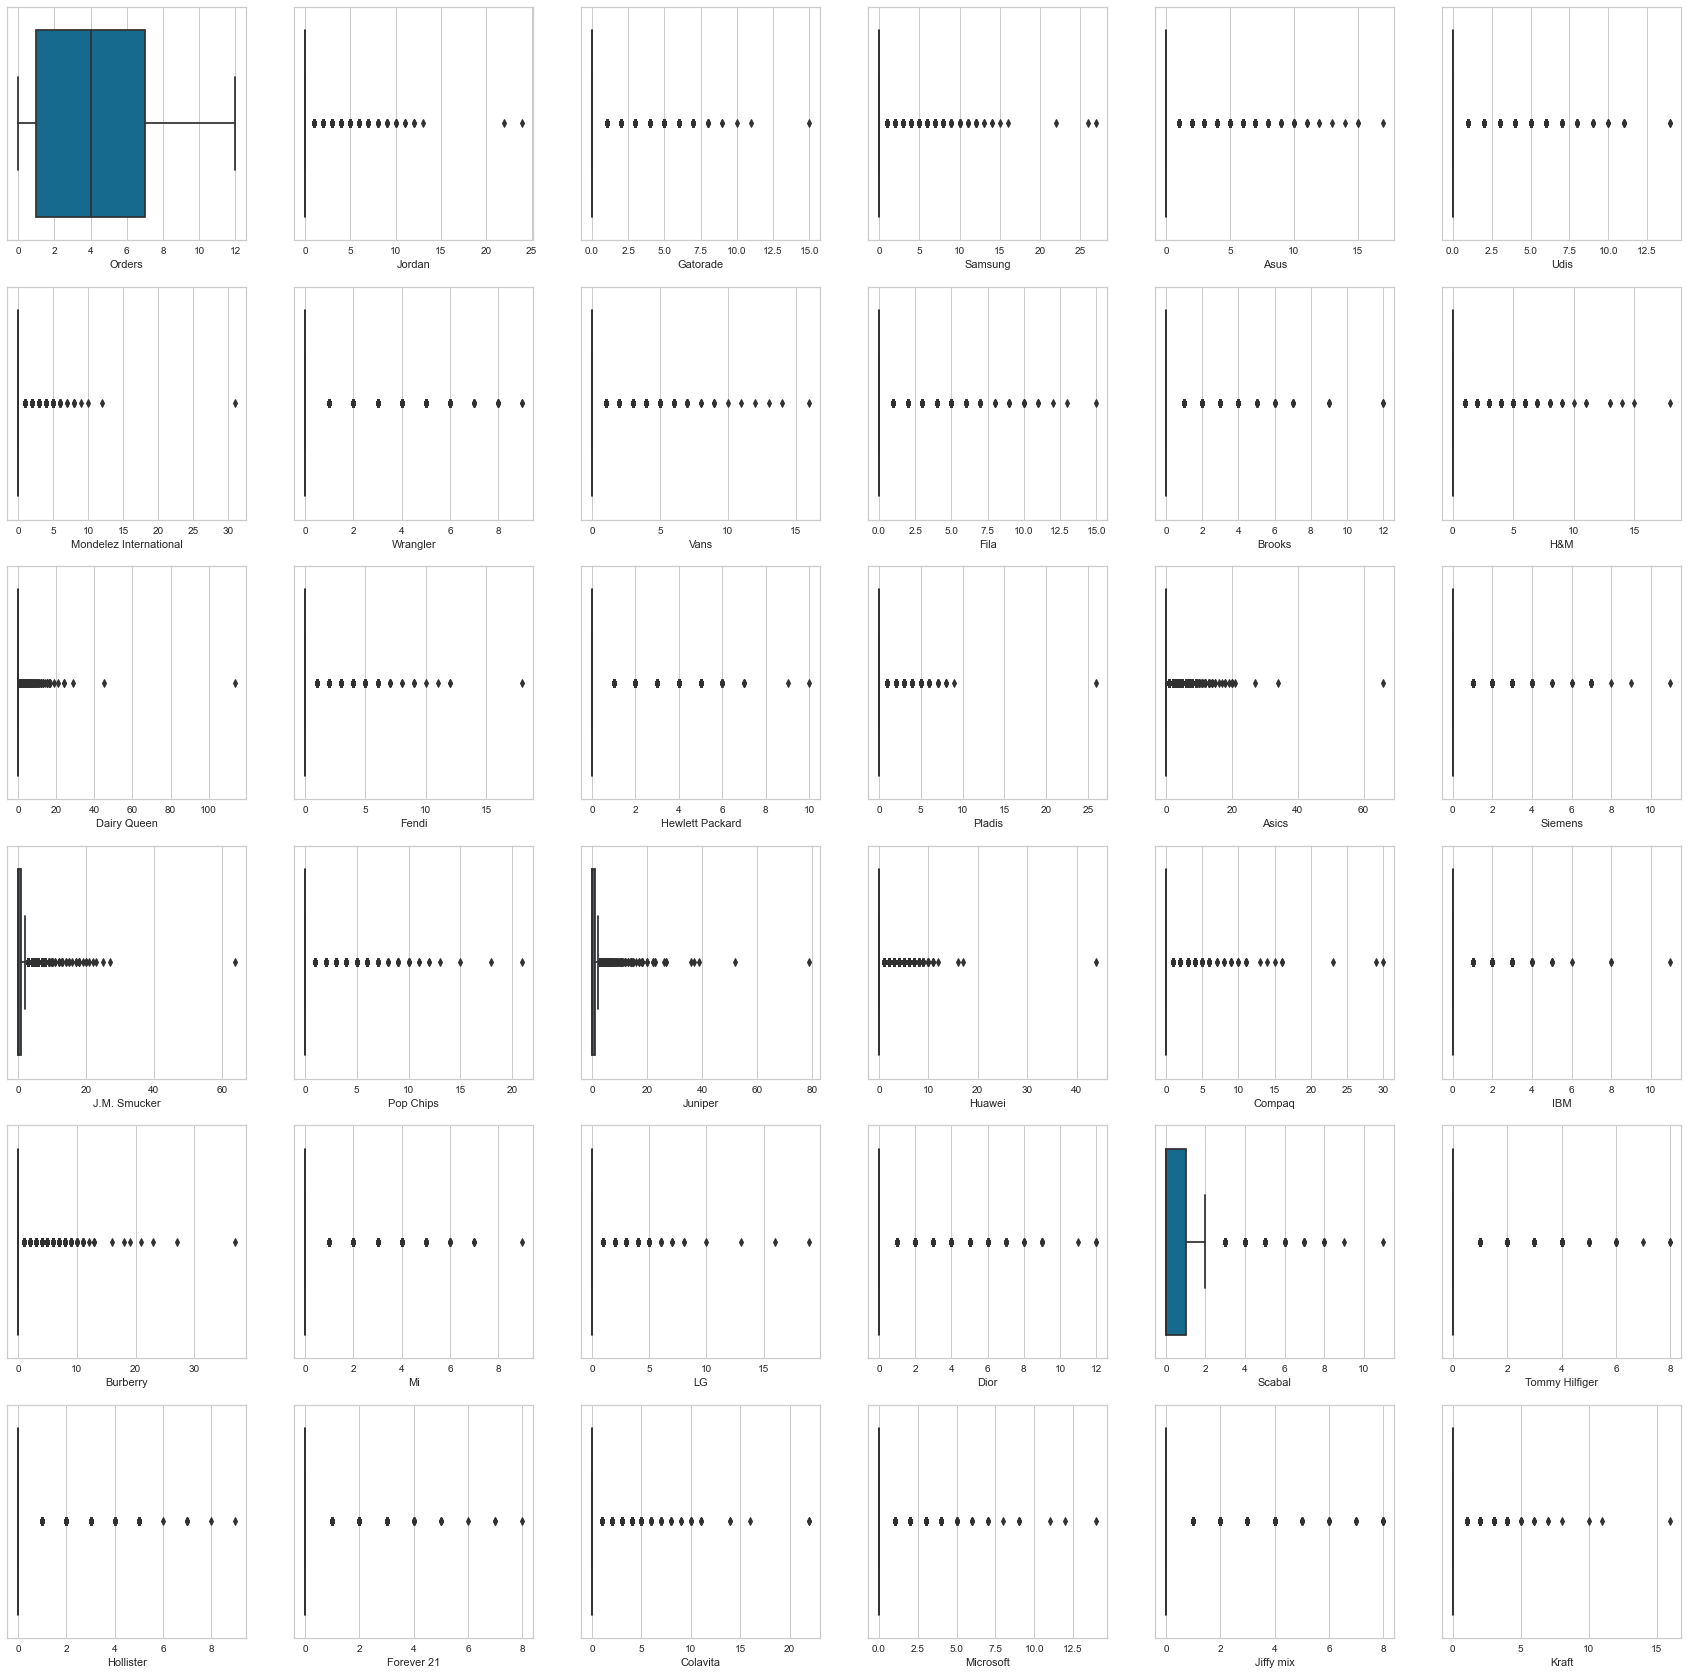

In [13]:
# Draw the boxplot for each brand
cols=list(data.columns[2:])

def dist_list(lst):
    plt.figure(figsize=(30,30))
    for i,col in enumerate(lst,1):
        plt.subplot(6,6,i)
        sns.boxplot(x=data[col])
dist_list(cols)

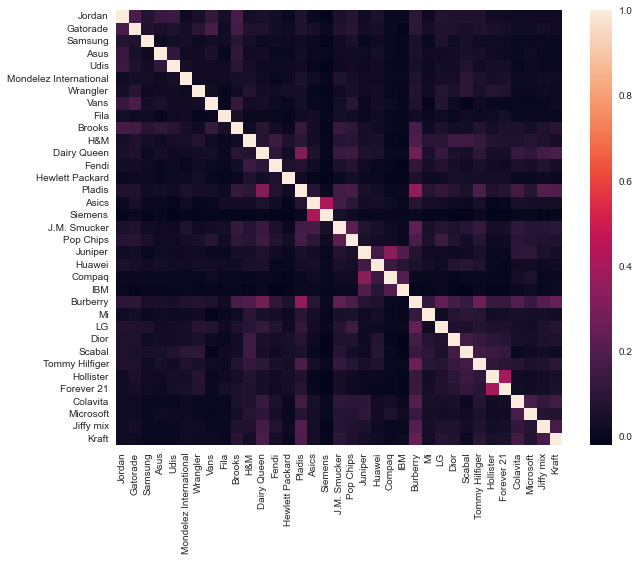

In [14]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.iloc[:,3:].corr())
plt.show()

In [15]:
# Scaling the data
x = data.iloc[:,2:].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x) # Normalizes the data

#### WCSS - Within Cluster Sum of Squares
Computes the sum of squared distance of each data point from the nearest centroid<br>It measures how the clusters are internally coherent<br>Lower the WCSS value, better the clustering

In [16]:
# K-Means Model

WCSS = []

for num in range(1,11):
    # Initialize the no of clusters
    kmeans = KMeans(n_clusters=num)
    # Fit the data on the model
    kmeans = kmeans.fit(x)
    # Compute the WCSS
    WCSS.append(kmeans.inertia_) 

In [17]:
pd.DataFrame({'No of clusters':[i for i in range(1,11)],'WCSS':WCSS})

,No of clusters,WCSS
0,1,4257.854830
1,2,2161.780172
2,3,1826.548613
3,4,1711.676040
4,5,1667.102856
5,6,1631.648113
6,7,1574.764652
7,8,1569.807572
8,9,1514.240652
9,10,1478.838926


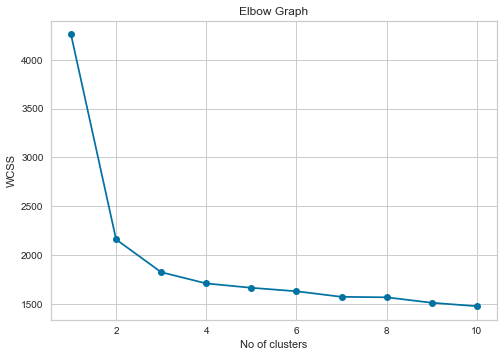

In [18]:
# To find the optimal no of clusters
plt.title('Elbow Graph')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.plot([i for i in range(1,11)],WCSS,'o-')
plt.show()

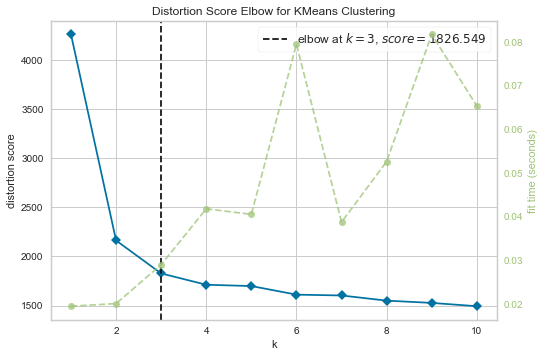

In [19]:
# K-Elbow Visualizer
visualizer = KElbowVisualizer(estimator = KMeans(),k = (1,11))
visualizer.fit(x)
visualizer.poof()
plt.show()

#### Silhouette Score
Measures how similar a data point is to it's own cluster compared to other clusters<br>
i.e. It measures the intra-cluster distance & the inter-cluster distance for each data point.

s(i) = (b(i) - a(i))/max(a(i),b(i))<br>where,<br>s(i) - silhouette score for data point i<br>a(i) - avg distance of data point i from all the other points within the cluster(intra-cluster distance)<br>b(i) - avg distance of data point i from all data points belonging to the nearest cluster(inter-cluster distance)

In [20]:
silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    # Find the nearest cluster for each data point
    cluster_labels = kmeans.fit_predict(x)
    # Compute the silhouette score
    silhouette.append(silhouette_score(x,cluster_labels))

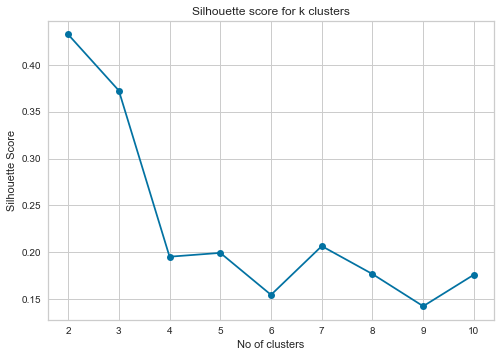

In [21]:
plt.plot([i for i in range(2,11)],silhouette,'o-')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score for k clusters')
plt.show()

In [22]:
# Build the K-Means model
model = KMeans(n_clusters=3)
model = model.fit(x)

In [23]:
# Prediction
y = model.predict(x) # Gives the cluster center to which the data point belongs
data['Cluster'] = y
centroids = model.cluster_centers_ 

#### Insights 

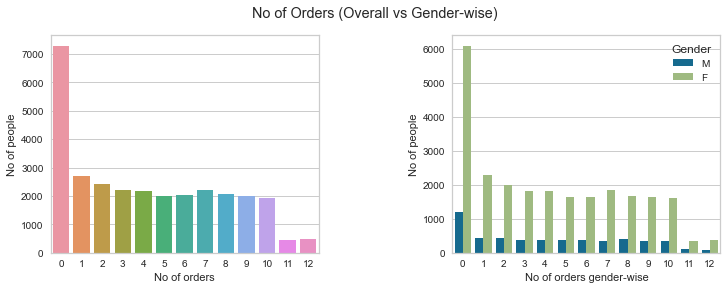

In [24]:
# No of Orders
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(x = data['Orders'])
plt.xlabel('No of orders')
plt.ylabel('No of people')

plt.subplot(1,2,2)
sns.countplot(x = data['Orders'],hue = data['Gender'])
plt.xlabel('No of orders gender-wise')
plt.ylabel('No of people')

plt.subplots_adjust(wspace=0.5)
plt.suptitle('No of Orders (Overall vs Gender-wise)')
plt.show()


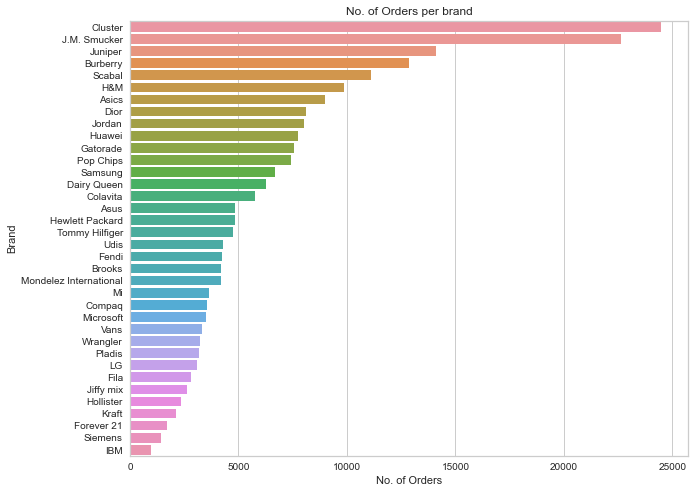

In [25]:
# No of orders based on brands
plt.figure(figsize=(10,8))
brands = data.columns[3:]
orders_by_brand = data[brands].sum().sort_values(ascending = False)
sns.barplot(x = orders_by_brand.values,y = orders_by_brand.index)
plt.xlabel('No. of Orders')
plt.ylabel('Brand')
plt.title('No. of Orders per brand')
plt.show()

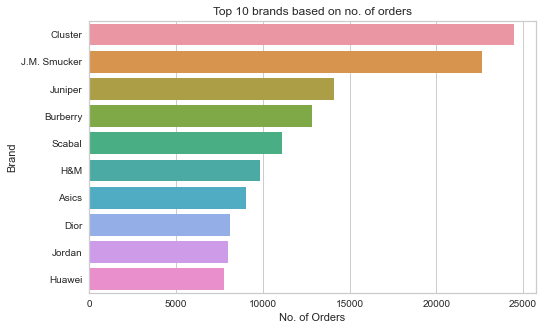

In [26]:
# Top 10 brands based on no. of orders
plt.figure(figsize=(8,5))
brands = data.columns[3:]
orders_by_brand = data[brands].sum().sort_values(ascending = False)[:10]
sns.barplot(x = orders_by_brand.values,y = orders_by_brand.index)
plt.xlabel('No. of Orders')
plt.ylabel('Brand')
plt.title('Top 10 brands based on no. of orders')
plt.show()

In [27]:
# Customers with highest no. of orders (top 10 customers)
data['Orders'].sort_values(ascending=False)[:10]

16255    12
6821     12
3529     12
6819     12
3178     12
15502    12
12697    12
13239    12
1512     12
24007    12
Name: Orders, dtype: int64

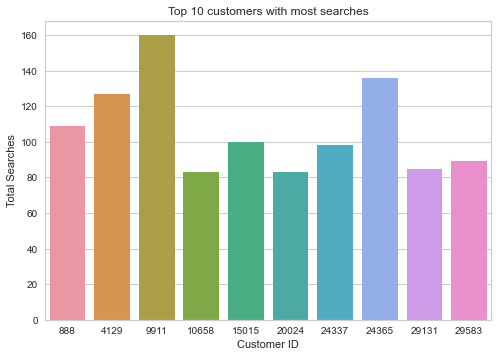

In [28]:
# Customers with most searches (top 10)
cust_search = data.iloc[:,3:].sum(axis = 1).sort_values(ascending = False)[:10]
data['Total Search'] = data.iloc[:,3:].sum(axis = 1)
sns.barplot(cust_search.index,cust_search.values)
plt.xlabel('Customer ID')
plt.ylabel('Total Searches')
plt.title('Top 10 customers with most searches')
plt.show()

In [29]:
# Check the data distribution among the 3 clusters
data['Cluster'].value_counts()

0    12432
1    10647
2     6921
Name: Cluster, dtype: int64

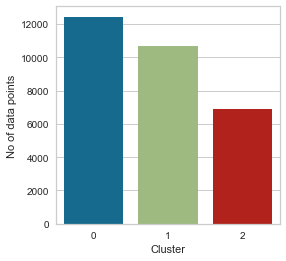

In [30]:
plt.figure(figsize=(4,4))
sns.countplot(x = data['Cluster'])
plt.ylabel('No of data points')
plt.show()

#### Overall cluster analysis

In [31]:
cluster_data = data.groupby(by=['Cluster'],as_index=False).sum()
cluster_data

,Cluster,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,182944741,7560,3071,2724,2521,1825,1707,1642,1283,...,3324,4369,1979,930,709,2346,1339,1030,918,81477
1,1,162353070,53098,3130,2911,2527,1849,1598,1563,1185,...,2932,4077,1652,886,647,2048,1293,976,705,86202
2,2,104717189,64436,1822,1935,1640,1166,1001,988,740,...,1878,2656,1138,514,364,1372,859,635,504,62953


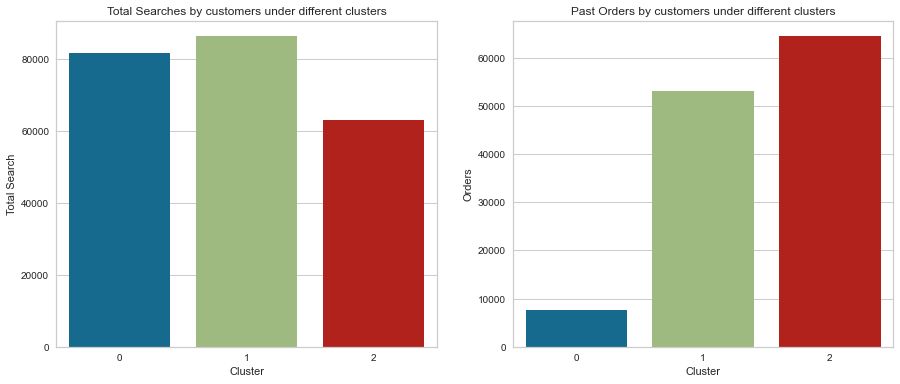

In [32]:
#Bar Plot showing cluster wise Total Searches
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=cluster_data,x='Cluster',y='Total Search')
plt.title('Total Searches by customers under different clusters')

#Bar Plot showing cluster wise Past orders
plt.subplot(1,2,2)
sns.barplot(data=cluster_data,x='Cluster',y='Orders')
plt.title('Past Orders by customers under different clusters')
plt.show()

#### Analysis on cluster 0

In [33]:
# Grouping customers those who belong to cluster 0 based on gender
cluster0_customers = data.groupby(by=['Cluster','Gender'],as_index=False).sum().query('Cluster == 0')
cluster0_customers

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,154699357,6269,2470,1947,2086,1813,1632,1480,...,3041,4194,1807,847,654,1960,1153,870,776,70690
1,0,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


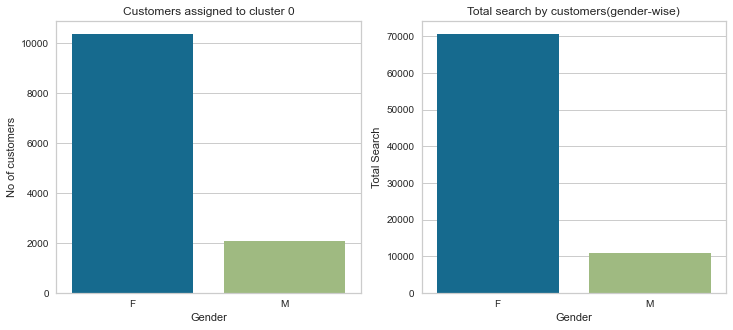

In [34]:
# No of customers assigned to cluster 0
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data = data.query('Cluster == 0'),x = 'Gender')
plt.title('Customers assigned to cluster 0')
plt.ylabel('No of customers')

# Total search based on gender
plt.subplot(1,2,2)
sns.barplot(data = cluster0_customers, x = 'Gender',y = 'Total Search')
plt.title('Total search by customers(gender-wise)')

plt.show()

#### Analysis on cluster 1

In [35]:
# Grouping customers those who belong to cluster 1 based on gender
cluster1_customers = data.groupby(by=['Cluster','Gender'],as_index=False).sum().query('Cluster == 1')
cluster1_customers

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,136127262,43761,2486,2014,2162,1821,1536,1372,...,2626,3953,1502,812,601,1682,1065,832,576,73807
3,1,M,26225808,9337,644,897,365,28,62,191,...,306,124,150,74,46,366,228,144,129,12395


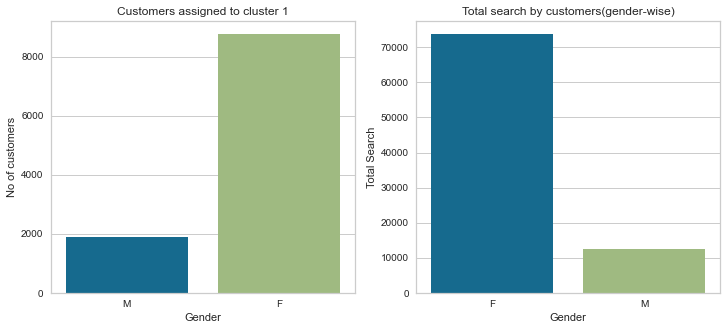

In [36]:
# No of customers assigned to cluster 1
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data = data.query('Cluster == 1'),x = 'Gender')
plt.title('Customers assigned to cluster 1')
plt.ylabel('No of customers')

# Total search based on gender
plt.subplot(1,2,2)
sns.barplot(data = cluster1_customers, x = 'Gender',y = 'Total Search')
plt.title('Total search by customers(gender-wise)')

plt.show()

#### Analysis on cluster 2

In [37]:
# Grouping customers those who belong to cluster 2 based on gender
cluster2_customers = data.groupby(by=['Cluster','Gender'], as_index=False).sum().query('Cluster == 2')
cluster2_customers

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,86845024,52600,1419,1267,1343,1158,957,881,...,1654,2579,1016,442,327,1118,718,546,425,53060
5,2,M,17872165,11836,403,668,297,8,44,107,...,224,77,122,72,37,254,141,89,79,9893


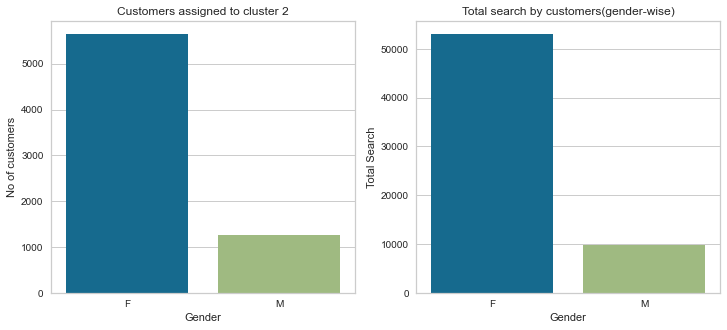

In [38]:
# No of customers assigned to cluster 2
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data = data.query('Cluster == 2'),x = 'Gender')
plt.title('Customers assigned to cluster 2')
plt.ylabel('No of customers')

# Total search based on gender
plt.subplot(1,2,2)
sns.barplot(data = cluster2_customers, x = 'Gender',y = 'Total Search')
plt.title('Total search by customers(gender-wise)')

plt.show()